In [43]:
%matplotlib inline
from ptsa.data.readers import BaseEventReader
import numpy as np
from matplotlib import pyplot as plt
rhino_root= '/Volumes/rhino_root'

### 1. pyFR

In [45]:
events = BaseEventReader(filename=rhino_root+'/data/events/pyFR/BW001_events.mat').read()
words  = events[events.type=='WORD']
serialpositions = np.unique(words.serialpos)

In [53]:
prec_by_serialpos = [words[words.serialpos==s].recalled.mean() for s in serialpositions]

([<matplotlib.axis.XTick at 0x11f8da450>,
 <a list of 9 Text xticklabel objects>)

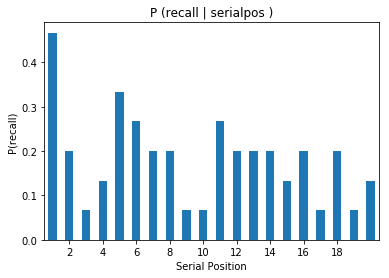

In [54]:
plt.bar(serialpositions, prec_by_serialpos,width=.5,)
plt.xlim([serialpositions.min()-0.5,serialpositions.max()+0.5])
plt.title('P (recall | serialpos )')
plt.ylabel('P(recall)')
plt.xlabel('Serial Position')
plt.xticks(range(2,20,2))

### 2. RAM FR1

The RAM data is organized via a Json index, which can be queried via the JsonIndexReader class. 
In theory, this saves you from having to know where the actual event files are located


In [55]:
from ptsa.data.readers.IndexReader import JsonIndexReader
jr = JsonIndexReader(rhino_root+'/protocols/r1.json')
events = np.concatenate([BaseEventReader(filename=f).read() for f in 
                         jr.aggregate_values('task_events',subject='R1111M',experiment='FR1')]
                        )
# Because np.concatenate turns record arrays into structured arrays, and attribute-like field access is nice 
events = events.view(np.recarray)

The remainder is the same as before:

In [56]:
words = events[events.type=='WORD']
serialpositions = np.unique(words.serialpos)
prec_by_serialpos  = [words[words.serialpos==s].recalled.mean() for s in serialpositions]

([<matplotlib.axis.XTick at 0x120416ad0>,
 <a list of 6 Text xticklabel objects>)

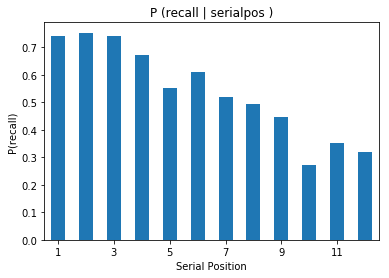

In [59]:
plt.bar(serialpositions, prec_by_serialpos,width=.5,)
plt.xlim([serialpositions.min()-0.5,serialpositions.max()+0.5])
plt.title('P (recall | serialpos )')
plt.ylabel('P(recall)')
plt.xlabel('Serial Position')
plt.xticks(serialpositions[::2])

### 3. LTPFR2

For purely behavioral analyses, it can be convenient to work with a pandas DataFrame, rather than a raw record array. 

This example is simple enough that there isn't much difference, but with more complex groupings the advantages accrue rapidly. 


In [65]:
import pandas as pd
events = BaseEventReader(filename=rhino_root+'/data/eeg/scalp/ltp/ltpFR2/behavioral/events/events_all_LTP093.mat',common_root='data').read()
events = pd.DataFrame.from_records([e for e in events],columns = events.dtype.names)

The parameter `common_root` is because the scalp data doesn't live in `/data/events`

In [81]:
prec_by_serialpos = events.loc[events.type=='WORD',['recalled','serialpos']].groupby('serialpos').mean()
print(type(prec_by_serialpos))

<class 'pandas.core.frame.DataFrame'>


A small change in the sytax will return a Series, rather than a DataFrame, though the underlying array is the same in both cases:

In [82]:
prec_series = events.loc[events.type=='WORD'].groupby('serialpos').recalled.mean()
print(type(prec_series))

<class 'pandas.core.series.Series'>


DataFrames have a their own plotting interface, which fills in a bunch of arguments to pyplot functions:

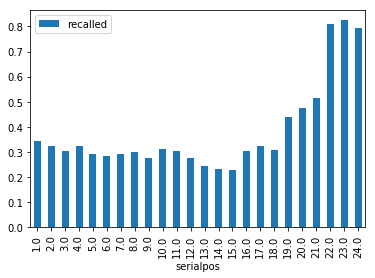

In [79]:
prec_by_serialpos.plot.bar()

...but they don't always turn out the way you want.